In [1]:
import os 
import tarfile

import pandas as pd
import numpy as np
import matplotlib as mp

In [2]:
data_path = os.path.join("datasets/cltv_data", "train_BRCpofr.csv")

In [3]:
data = pd.read_csv(data_path)

In [4]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [5]:
lables = data["cltv"]

In [6]:
data.drop("cltv", axis=1, inplace=True)

In [7]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold


In [8]:
%matplotlib inline

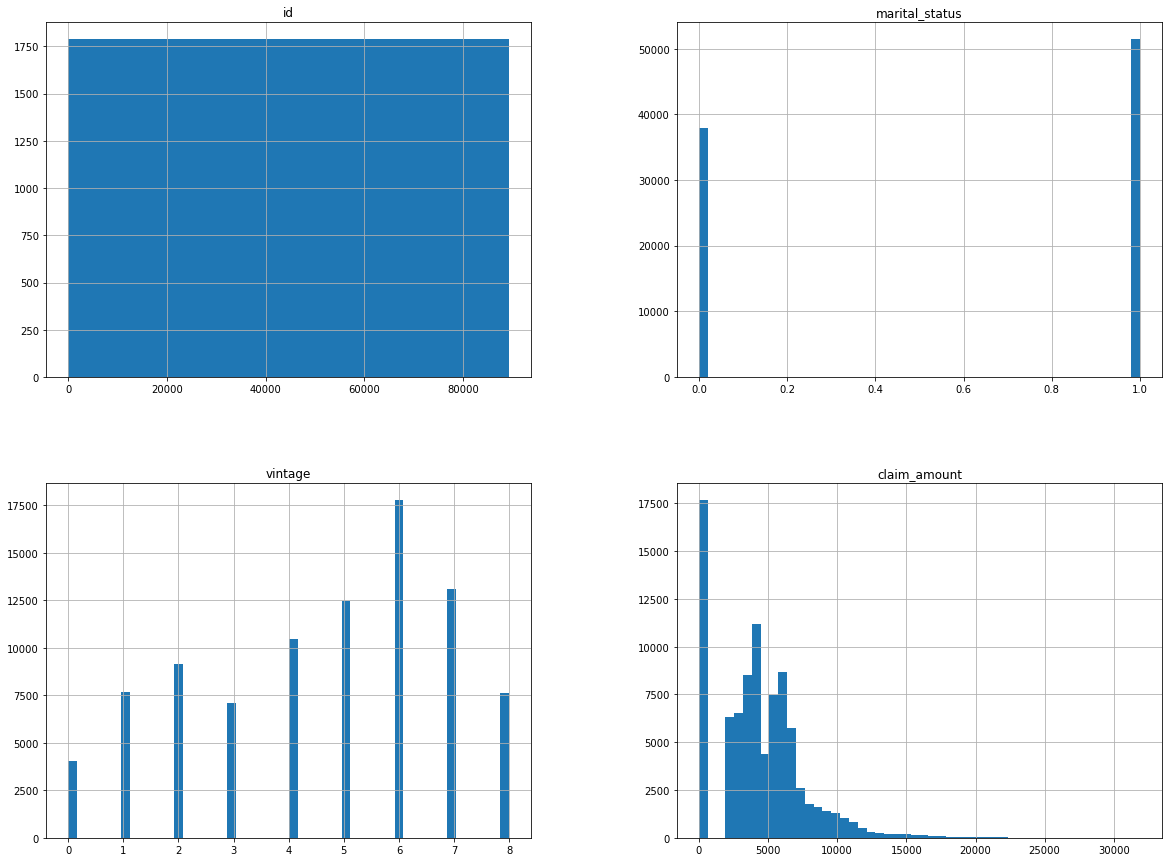

In [9]:
data.hist(bins=50, figsize=(20,15))
mp.pyplot.show()

In [10]:
data["vintage"].value_counts()

6    17769
7    13095
5    12481
4    10471
2     9165
1     7671
8     7624
3     7085
0     4031
Name: vintage, dtype: int64

In [11]:
data.isna().sum()

id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

In [12]:
gender_data = data[["gender"]]
area_data = data[["area"]]
qualification_data = data[["qualification"]]
income_data = data[["income"]]
num_policies_data = data[["num_policies"]]
policy_data = data[["policy"]]
type_of_policy_data = data[["type_of_policy"]]

In [13]:
policy_data.head()

,policy
0,A
1,A
2,A
3,A
4,A


In [14]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [15]:
ordinal_encoder = OrdinalEncoder()

In [16]:
cltv_income_encoded = ordinal_encoder.fit_transform(income_data)
cltv_income_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [3.]])

In [17]:
income_data[:10]

,income
0,5L-10L
1,5L-10L
2,5L-10L
3,5L-10L
4,More than 10L
5,More than 10L
6,5L-10L
7,5L-10L
8,5L-10L
9,More than 10L


In [18]:
income_data.value_counts()

income       
5L-10L           52716
2L-5L            21158
More than 10L    13664
<=2L              1854
dtype: int64

In [19]:
ordinal_encoder.categories_

[array(['2L-5L', '5L-10L', '<=2L', 'More than 10L'], dtype=object)]

In [20]:
one_hot_encoder = OneHotEncoder()

In [21]:
income_1hot_encoded = one_hot_encoder.fit_transform(income_data)

In [53]:
income_1hot_encoded.toarray()[:5]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

In [61]:
data.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold


In [62]:
vintage_ix, claim_amount_ix = 6, 7

In [63]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_claim_amount_per_year = False):
        self.add_claim_amount_per_year = add_claim_amount_per_year
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.add_claim_amount_per_year:
            claim_per_year = X[:, claim_amount_ix] / X[:, vintage_ix]
            return np.c_[X, claim_per_year]
        return np.c_[X]

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler'   , StandardScaler())
])

data_num = data[['vintage', 'claim_amount']]

In [68]:
from sklearn.compose import ColumnTransformer

num_attributes = list(data_num)
cat_attributes = ["gender", "area", "qualification", "income", "num_policies", "policy", "type_of_policy"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes)
])

data_prepared = full_pipeline.fit_transform(data)
data_prepared

array([[ 0.17653059,  0.44094022,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.48632666,  0.22330513,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.48632666, -0.53719159,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.26006809, -0.30300396,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.48632666, -1.33385863,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.61312928, -1.33385863,  1.        , ...,  1.        ,
         0.        ,  0.        ]])